In [1]:
# Function for reading docx files as text 
import docx # importing the library for reading docx files as text

def readdoctext(filename):
    doc = docx.Document(filename) # this line of code reads file as paras and this needs to be converted to text
    fullText = [] # creating this to add all text from the document in a for loop
    for para in doc.paragraphs: # reading text from paras to add to full text
        txt = para.text.encode('ascii', 'ignore')
        fullText.append(txt)
    return fullText # when the function is called, it returns the full text of the docx file and assigns to the variable used

In [2]:
import PyPDF2 # python library for reading pdfs. This function does nto read OCR docs
#Function for reading pdf files as text
def readpdftext(filename):
    pdfFileObj = open(filename,'rb')     #'rb' for read binary mode
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pdfReader.numPages
    pdffile = '' # This creates an empty string object to which the text from the pdf file will be added
    for i in range(0,pdfReader.numPages): # iterating page by page to read text
        pageObj = pdfReader.getPage(i)          
        pdffile = pdffile + pageObj.extractText()
    return pdffile # when the function is called, it returns text of the pdf file and assigns to the variable used

In [3]:
import os # used for file reading and path handling

In [4]:
# the path to your pdf file directory. Change this every time a different folder for pdfs is used. 
# Ensure to add "\\" to path in windows
myfiledir = "C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser"

In [5]:
from pathlib import Path # importing path to convert above text type path to path type

In [6]:
myfiledir =  Path(myfiledir) # path is now the final path of the pdfs

In [7]:
type(myfiledir) # Check to ensure that the output is "pathlib.WindowsPath"

pathlib.WindowsPath

In [8]:
# Importing libraries that will be used for further manipulation
import pandas as pd
import glob

In [9]:
pdffiles = glob.glob(os.path.join(myfiledir, '*.pdf')) # identify the list of all pdf documents

In [10]:
docfiles = glob.glob(os.path.join(myfiledir, '*.docx')) # identify the list of all docx documents

In [11]:
all_files = pdffiles + docfiles # identify the list of all pdf and docx 

In [12]:
type(all_files) # check to ensure that the all files list is list type in python

list

In [13]:
all_files # checking the list of all files

['C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Accenture-Digitizing-Energy-Analytics-Powered-Performance.pdf',
 'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\AT-03430-WP-Beyond Digitalization.pdf',
 'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Data_Science_from_Scratch_First_Princ.pdf',
 'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\digital-landscaping-study-of-the-oil-and-gas-sector-application-of-data-analytics-technologies-to-improve-asset-operations-and-maintenance.pdf',
 'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\paper_on_evolution_of_maintenance_for_FEAST_on_EITAC_2018_conference_-_Eyoh_Jerry1.pdf',
 'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Statistical Analyses of Historical Pipelin

In [14]:
import os.path

In [15]:
# Demonstration of the use of splitext method since this will be used later
file_ext = os.path.splitext("Zukhrufany_Stiffi.pdf")
file_ext[1]

'.pdf'

In [16]:
data = {} # creating a dictionary which will have the file names as keys and content as value
# Dictionaries are key:value pairs and the value can be accessed using the key 
for file in all_files: 
    if os.path.splitext(file)[1] == '.pdf':
        data.update({os.path.splitext(file)[0]: readpdftext(file)})
    elif os.path.splitext(file)[1] == ".docx":
        data.update({os.path.splitext(file)[0]: readdoctext(file)})

In [17]:
# Checking to see that the data is read and how it looks. The keys are full path rather than name of file
print(data)

{'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Accenture-Digitizing-Energy-Analytics-Powered-Performance': 'Digitizing Energy \nAnalytics-Powered Performance\nOpportunities for oil and gas companies \n to improve business outcomes \n2Introduction\n      \n  3Section 1: The current analytics landscape in\n   5 oil and gas\n        \n1.1 Survey reveals barriers to better business outcomes\n 61.2 Insights into the analytics tipping point\n   \n11\nSection 2: Seizing the opportunities for \n   \n16 \nanalytics-powered performance\n2.1 Upstream operations\n      \n18\n2.2 Downstream operations\n     \n23\n2.3 Corporate functions\n      \n24\nSection 3: Achieving better business outcomes \n 28\n from analytics in oil and gas\n    \n3.1 Accenture analytics capability maturity model \n  \n29\n3.2 Recommendations for becoming analytically-powered \n 31\n\n\n\n\n\n\n and operations analytics \n      \n\n\n enterprise\nConclusion\n        \n37\nCon

In [18]:
# Checking the access to specific value using the key
data['C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Accenture-Digitizing-Energy-Analytics-Powered-Performance']

'Digitizing Energy \nAnalytics-Powered Performance\nOpportunities for oil and gas companies \n to improve business outcomes \n2Introduction\n      \n  3Section 1: The current analytics landscape in\n   5 oil and gas\n        \n1.1 Survey reveals barriers to better business outcomes\n 61.2 Insights into the analytics tipping point\n   \n11\nSection 2: Seizing the opportunities for \n   \n16 \nanalytics-powered performance\n2.1 Upstream operations\n      \n18\n2.2 Downstream operations\n     \n23\n2.3 Corporate functions\n      \n24\nSection 3: Achieving better business outcomes \n 28\n from analytics in oil and gas\n    \n3.1 Accenture analytics capability maturity model \n  \n29\n3.2 Recommendations for becoming analytically-powered \n 31\n\n\n\n\n\n\n and operations analytics \n      \n\n\n enterprise\nConclusion\n        \n37\nContents\nAnalytics\nInsights\nAction\n3Energy is an industry dominated by \n\n\ndisciplines that embrace facts and figures \n\n\n\ndecisions. Yet a recent Acc

In [19]:
# Make a copy of the dictionary to avoid replacing the original data
data2 = data.copy()

In [20]:
# using the copied dictionary, we are replacing the path with just file name
for key, value in list(data2.items()):
    k = key
    m = key.split("\\")[-1]
    data2[m] = data2.pop(key)

In [21]:
# Checking to confirm that the replacement of keys has worked
data2.keys()

dict_keys(['Accenture-Digitizing-Energy-Analytics-Powered-Performance', 'AT-03430-WP-Beyond Digitalization', 'Data_Science_from_Scratch_First_Princ', 'digital-landscaping-study-of-the-oil-and-gas-sector-application-of-data-analytics-technologies-to-improve-asset-operations-and-maintenance', 'paper_on_evolution_of_maintenance_for_FEAST_on_EITAC_2018_conference_-_Eyoh_Jerry1', 'Statistical Analyses of Historical Pipeline Incident Data with Ap', 'Zukhrufany_Stiffi', 'A-302594-S00-PROP-001-A01', 'A-302594-S00-PROP-001-A01_VS', 'A-302594-S00-PROP-002-A01'])

In [22]:
# Sample to show that some files are not read (likely OCR docs or special image included in front pages)
data2["Data_Science_from_Scratch_First_Princ"]

''

In [23]:
# Sample to show that other files are read
data2["Zukhrufany_Stiffi"]

' \n \n \n \n \n \n \n \n \n \nFaculty of Science and Technology\n \n\n \nStudy program/ Specialization:\n \nRisk Management/ Risk Management\n \nS\npring semest\ner, 2018\n \n \nOpen / Restricted access\n \nWriter\n:\n \nStiffi Zukhrufany\n \n\n \n\n \nFaculty supervisor\n:\n \nProf. \nEirik.B. Abrahamsen\n \nExternal supervisor\n:\n \n-\n \nTitle of thesis\n:\n \nThe Utilization of Supervised Machine Learning in Predicting \nCorrosion to Support \nPreventing Pipelines Leakage in Oil and Gas Industry\n \nCredit (ECTS): 30 ECTS\n \n \n \nPages              : 53\n \n+ enclosure     : 8\n \nStavanger, 15\nth\n \nJune 2018\n \nKeywords:\n \n-\n \nOil and Gas Pipelines\n \n-\n \nCorrosion\n \n-\n \nSupervised Machine Learning\n \n-\n \nDecision\n-\nm\naking\n \ni\n \n \nAbstract\n \n \n \nPipelines ha\nve\n \nbecome indispensable i\nn\n \noil and gas industry to support transportation of \nflammable \nand poisonous fluids such as \ncrude oil, natural gas\n,\n \nand refined petroleum produc

In [24]:
# Making a copy of the modified dictionary to in the next step remove those docs that were not read
data3 = data2.copy()

In [25]:
unread = [] # empty list at the moment. This will contain the list of unread documents 

for key, value in list(data3.items()):
    if data3[key] == '':
        unread.append(key)
        del data3[key]

In [26]:
# Checking to see that the unread file is removed
data3.keys()

dict_keys(['Accenture-Digitizing-Energy-Analytics-Powered-Performance', 'AT-03430-WP-Beyond Digitalization', 'digital-landscaping-study-of-the-oil-and-gas-sector-application-of-data-analytics-technologies-to-improve-asset-operations-and-maintenance', 'paper_on_evolution_of_maintenance_for_FEAST_on_EITAC_2018_conference_-_Eyoh_Jerry1', 'Statistical Analyses of Historical Pipeline Incident Data with Ap', 'Zukhrufany_Stiffi', 'A-302594-S00-PROP-001-A01', 'A-302594-S00-PROP-001-A01_VS', 'A-302594-S00-PROP-002-A01'])

In [27]:
# Checking to see that the number remaining in latest data file
len(data3)

9

In [28]:
# Checking the contents of unread files list
unread

['Data_Science_from_Scratch_First_Princ']

In [29]:
# Checking to confirm that the numer of docs remaining and number of docs unread add up to total number of docs
len(data2) == len(data3) + len(unread)

True

The data is now read and ready for manipulation. Note that the 3rd data file (data3) is the file that contains all the text documents extracted from pdfs and docx files. The next steps would be to 
- remove any punctuations
- remove numbers (since when we start searching whether a specific word is in the document, don't need numbers)
- remove english stop words (words like is, an , the that etc.)
- Create a word cloud

In [54]:
import re
# Remove puntuation
for key, value in data3.items():
    data3[key] = re.sub(r'[-./?!,":;()\']',' ',str(data3[key]))
    data3[key] = data3[key].lower()

In [55]:
data3['Zukhrufany_Stiffi']

'[ n    n    n    n    n    n    n    n    n    nfaculty    science    technology    n    n    n    nstudy    program    specialization    n    nrisk    management    risk    management    n    ns    npring    semest    ner    n    n    nopen    restricted    access    n    nwriter    n    n    nstiffi    zukhrufany    n    n    n    n    n    nfaculty    supervisor    n    n    nprof    neirik    b    abrahamsen    n    nexternal    supervisor    n    n    n    n    ntitle    thesis    n    n    nthe    utilization    supervised    machine    learning    predicting    ncorrosion    support    npreventing    pipelines    leakage    oil    gas    industry    n    ncredit    ects    ects    n    n    n    npages    n    n    enclosure    n    nstavanger    nth    n    njune    n    nkeywords    n    n    n    noil    gas    pipelines    n    n    n    ncorrosion    n    n    n    nsupervised    machine    learning    n    n    n    ndecision    n    nm    naking    n    ni    n    n    n

In [56]:
# Remove numbers
for key, value in data3.items():
    data3[key] = re.sub('[-|0-9]',' ',str(data3[key]))

In [57]:
# Import the key packahe in python that is used for natural language processing
import nltk

In [58]:
# For removing the stop words would first require the text files to be "tokenised" 
# which is to make python read words as words rather than as a chunk of text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [59]:
# For downloading the stop words and other corpus support tools like punk
nltk.download_gui()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [60]:
# assigning the stop words from english language to a variable
stop_words = set(stopwords.words('english'))

In [61]:
# RegexpTokenizer will help us remove the puntuation that was not already removed (like the \\ that were left)
from nltk.tokenize import RegexpTokenizer
#Firstly we will need to make python read the blob of text as sentence and this tokenizer will help with that
from nltk.tokenize import sent_tokenize
for key, value in list(data3.items()):
    tokenized_sent = sent_tokenize(str(data3[key]))
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_word = tokenizer.tokenize(str(tokenized_sent))
    data3[key] = tokenized_word # This is all the words in each of the docs listed 

In [62]:
for key, value in list(data3.items()): # This loop removes all the stop words in the word lists
    filtered_words = [] 
    for w in data3[key]: 
        if w not in stop_words: 
            filtered_words.append(w)
    data3[key] = filtered_words 

In [63]:
# This package allows easy generation of word clouds that will help us 
# identify the topics that are most prominent in each of the files
from wordcloud import WordCloud

In [64]:
# This library is needed for plotting the word cloud and then saving it as a file
import matplotlib.pyplot as plt

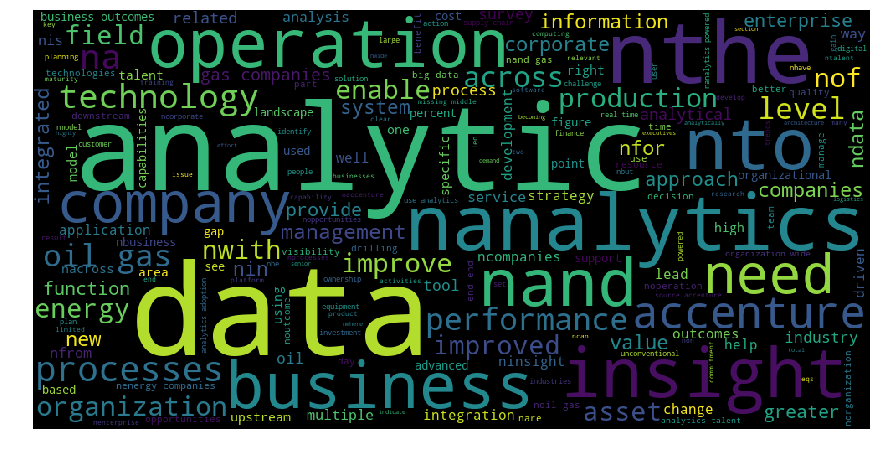

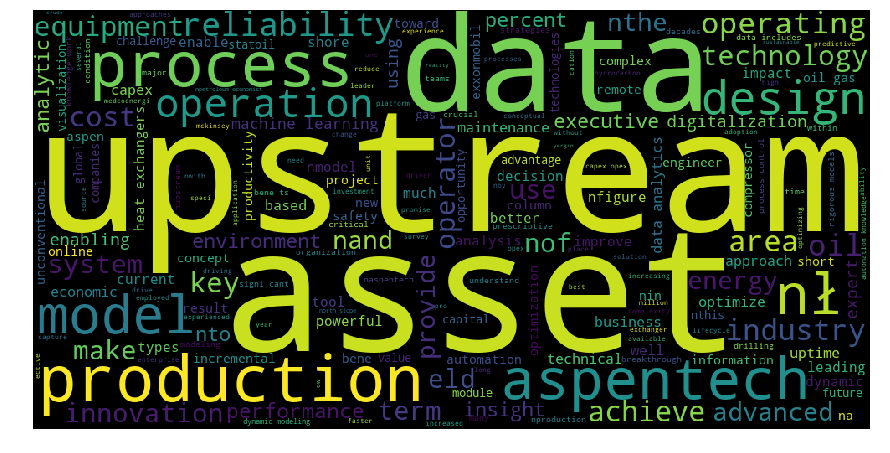

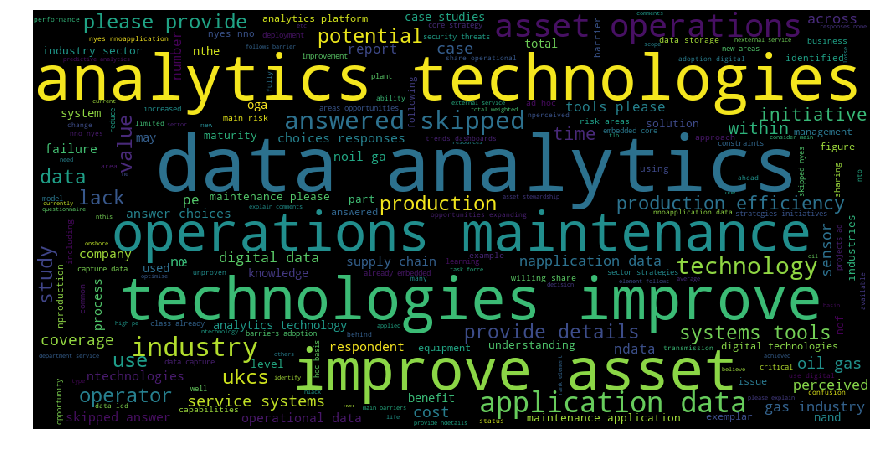

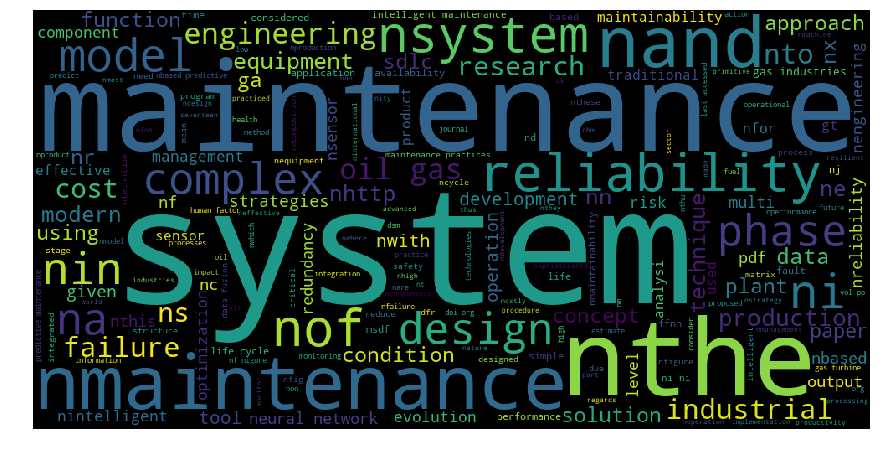

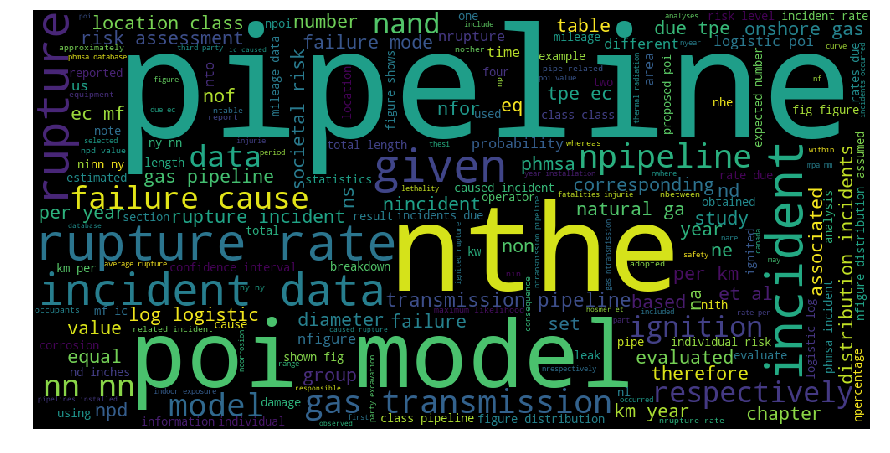

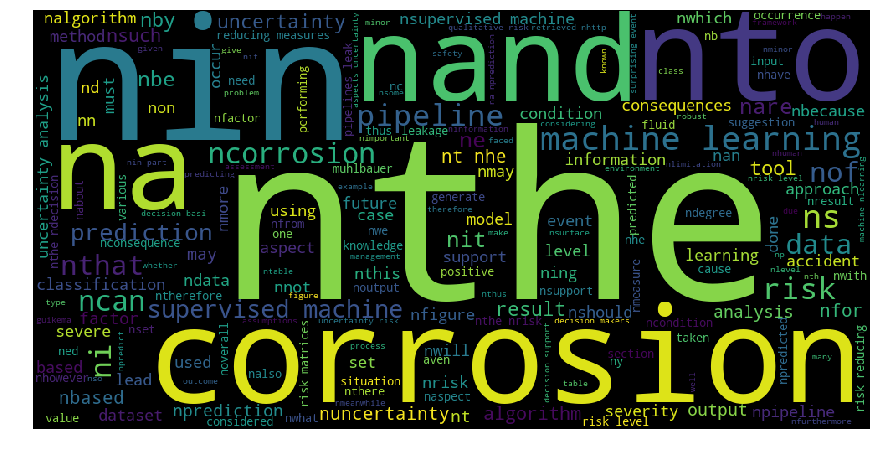

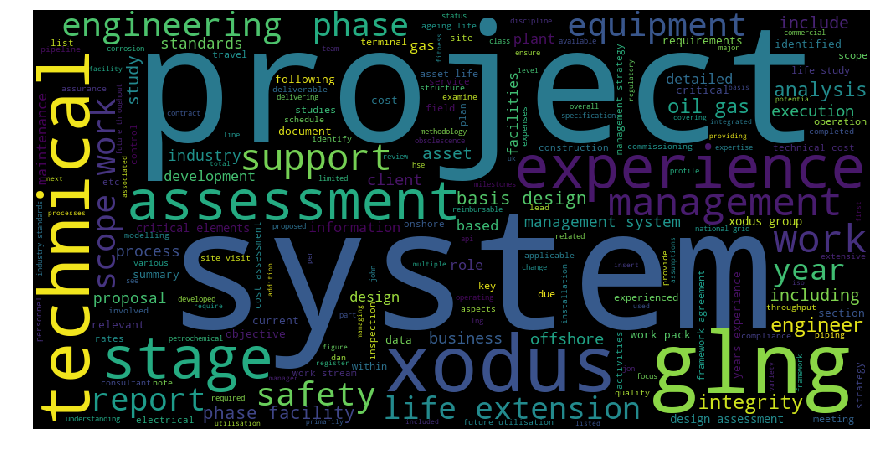

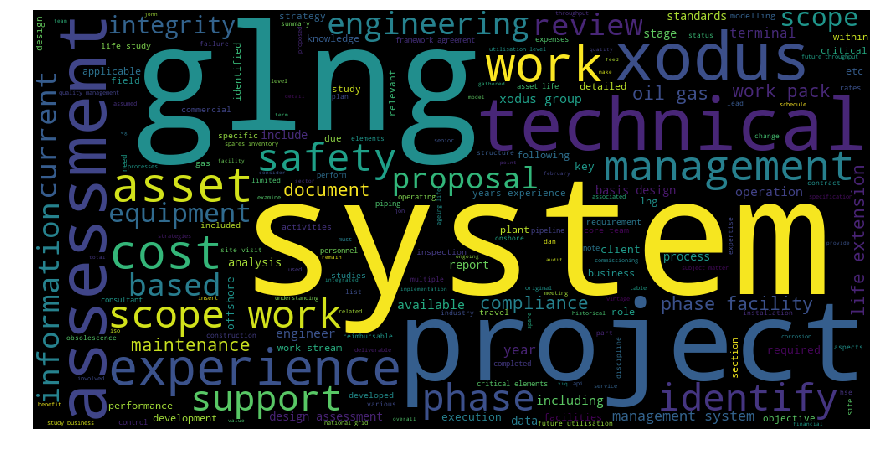

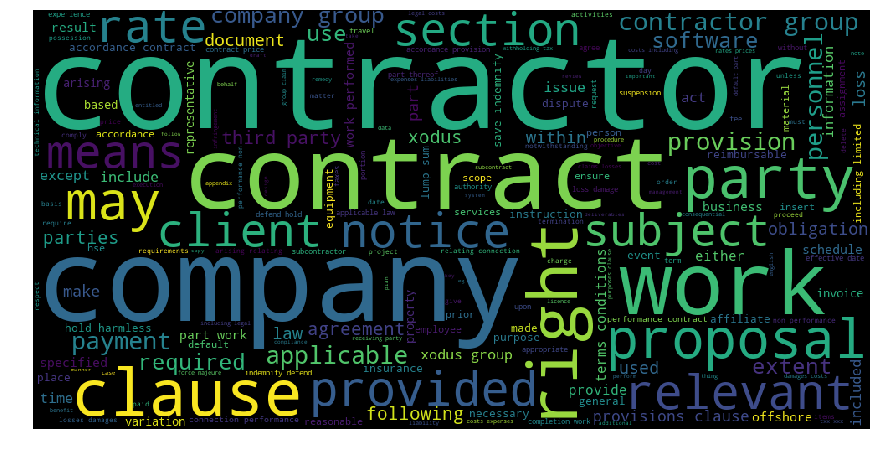

In [65]:
# Let us start plotting the word clouds for all the files
for key, value in list(data3.items()): # Loop through the data and save each word cloud by the file name
    wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(data3[key]))
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    name = str(key) + ".jpeg"
    plt.savefig(name)

In [66]:
# 
from nltk.stem.porter import *
import numpy as np
import collections

In [67]:
data4 = data3.copy()

In [68]:
for key, value in list(data4.items()):
    count = collections.Counter(data4[key])
    data4[key] = count

In [69]:
data4["A-302594-S00-PROP-002-A01"]["proposal"]

25

Now data4 can be used to look for the words that are needed if the word clouds do not make things clear. 

In [259]:
'''from nltk.stem.porter import *
import numpy as np
import collections

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

stemmer = PorterStemmer()
stemmed = stem_tokens(data3["A-302594-S00-PROP-002-A01"], stemmer)
count = collections.Counter(stemmed)
print(count)'''

'from nltk.stem.porter import *\nimport numpy as np\nimport collections\n\ndef stem_tokens(tokens, stemmer):\n    stemmed = []\n    for item in tokens:\n        stemmed.append(stemmer.stem(item))\n    return stemmed\n\nstemmer = PorterStemmer()\nstemmed = stem_tokens(data3["A-302594-S00-PROP-002-A01"], stemmer)\ncount = collections.Counter(stemmed)\nprint(count)'